In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=False)

test_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

train_images, train_labels = next(iter(train_loader))
test_images, test_labels = next(iter(test_loader))

# CIFAR-10 class names for legends
class_names = train_dataset.classes

print('Train images:', train_images.shape)
print('Train labels', train_labels.shape)
print('Test images:', test_images.shape)
print('Test labels:', test_labels.shape)
print('Classes:', class_names)

100%|██████████| 170M/170M [01:20<00:00, 2.12MB/s] 



Train images: torch.Size([50000, 3, 32, 32])
Train labels torch.Size([50000])
Test images: torch.Size([10000, 3, 32, 32])
Test labels: torch.Size([10000])
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [2]:
# Flatten CIFAR-10 images: (N, 3, 32, 32) -> (N, 3072)
X = train_images.view(train_images.size(0), -1).numpy()
y = train_labels.numpy()
print(X.shape)

(50000, 3072)


/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


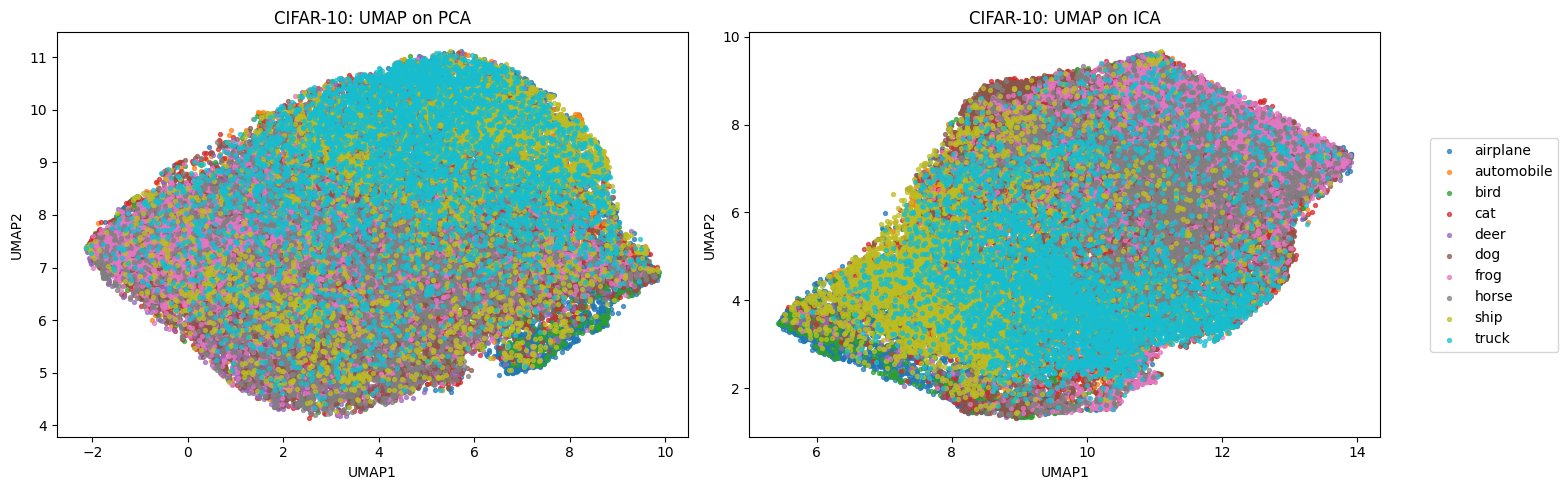

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import umap

random_state = 42
n_lin = 10    # target dims for PCA/ICA
n_out = 2      # UMAP output dims: 2D plot

# Linear reducers (to n_lin-D)
pca = make_pipeline(StandardScaler(with_mean=True), PCA(n_components=n_lin, random_state=random_state))
X_pca = pca.fit_transform(X)

ica = make_pipeline(StandardScaler(with_mean=True), FastICA(n_components=n_lin, random_state=random_state, max_iter=1000))
X_ica = ica.fit_transform(X)


# UMAP from n_linD → 2D
# Tips:
# - n_neighbors controls local vs global structure (higher ~ more global).
# - min_dist controls cluster tightness (lower → tighter clusters).
# - metric='cosine' often works well for embeddings/text; 'euclidean' is fine for many numeric sets.
umap_cfg = dict(n_neighbors=30, min_dist=0.05, n_components=n_out, metric='euclidean', random_state=random_state)

umap_pca = umap.UMAP(**umap_cfg).fit_transform(X_pca)
umap_ica = umap.UMAP(**umap_cfg).fit_transform(X_ica)

# ----- Plot with legend showing CIFAR-10 class-color mapping -----
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: UMAP on PCA
for cls in range(10):
    mask = y == cls
    ax1.scatter(umap_pca[mask, 0], umap_pca[mask, 1], s=8, label=class_names[cls], alpha=0.7)
ax1.set_title("CIFAR-10: UMAP on PCA")
ax1.set_xlabel("UMAP1")
ax1.set_ylabel("UMAP2")

# Plot 2: UMAP on ICA
for cls in range(10):
    mask = y == cls
    ax2.scatter(umap_ica[mask, 0], umap_ica[mask, 1], s=8, label=class_names[cls], alpha=0.7)
ax2.set_title("CIFAR-10: UMAP on ICA")
ax2.set_xlabel("UMAP1")
ax2.set_ylabel("UMAP2")

# Add a shared legend
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1)

plt.tight_layout()
plt.show()

/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


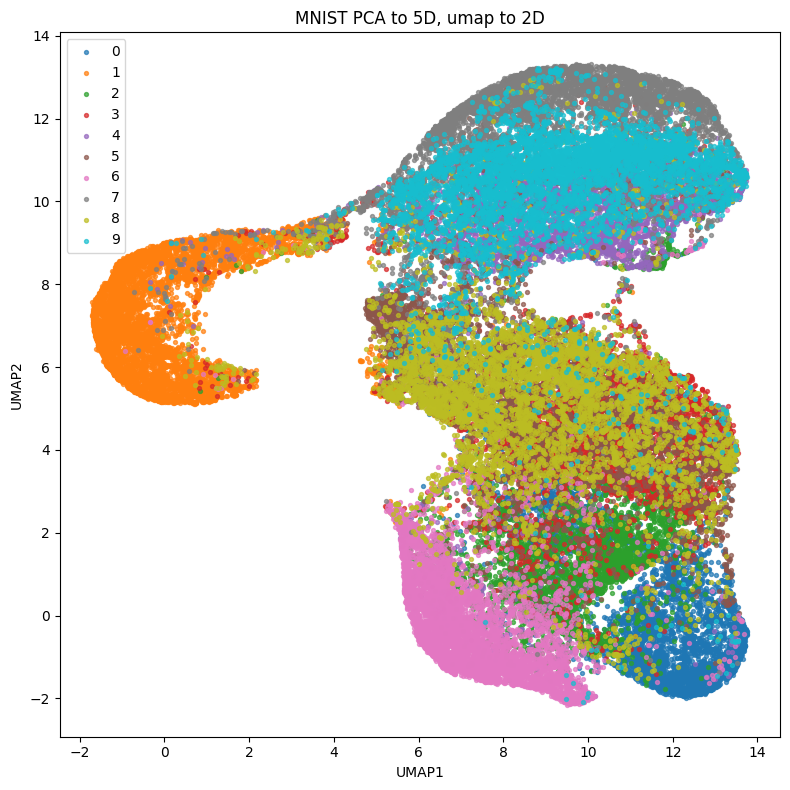

/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


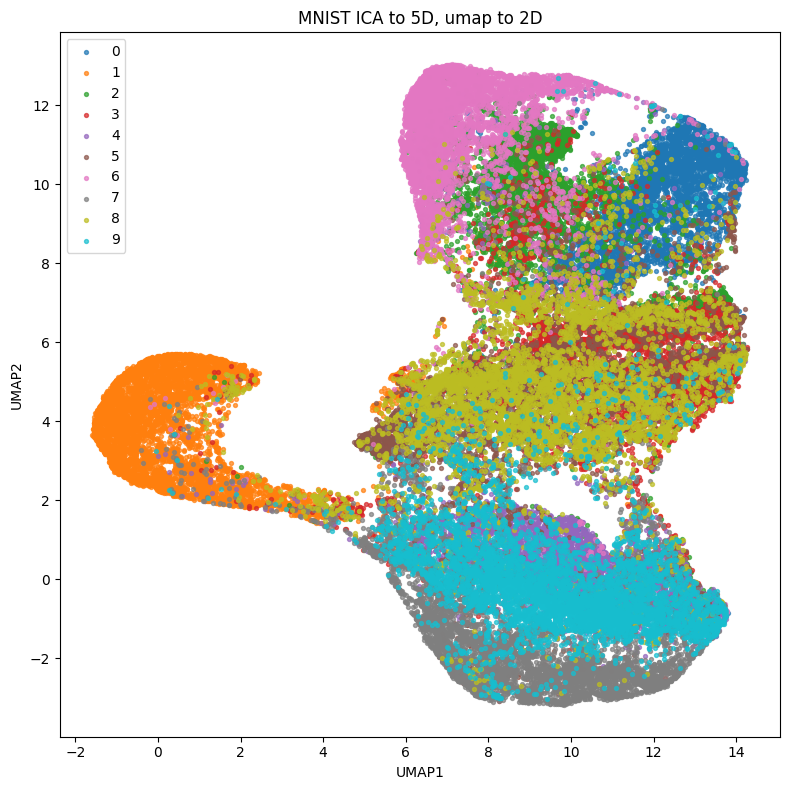

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import umap

random_state = 42
n_lin = 5  # target dims for PCA/ICA
n_out = 2      # UMAP output dims: 2D plot

# Tips:
# - n_neighbors controls local vs global structure (higher ~ more global).
# - min_dist controls cluster tightness (lower → tighter clusters).
# - metric='cosine' often works well for embeddings/text; 'euclidean' is fine for many numeric sets.
umap_cfg = dict(n_neighbors=31, min_dist=0.05, n_components=n_out, metric='euclidean', random_state=random_state)

# Linear reducers (to n_lin-D)
pca = make_pipeline(StandardScaler(with_mean=True), PCA(n_components=n_lin, random_state=random_state))
X_pca = pca.fit_transform(X)
umap_pca = umap.UMAP(**umap_cfg).fit_transform(X_pca)

plt.figure(figsize=(8, 8))
for cls in range(10):
    mask = y == cls
    plt.scatter(umap_pca[mask, 0], umap_pca[mask, 1], s=8, label=class_names[cls], alpha=0.7)

plt.title(f"CIFAR-10 PCA to {n_lin}D, UMAP to 2D")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend()
plt.tight_layout()
plt.show()

ica = make_pipeline(StandardScaler(with_mean=True), FastICA(n_components=n_lin, random_state=random_state, max_iter=1000))
X_ica = ica.fit_transform(X)
umap_ica = umap.UMAP(**umap_cfg).fit_transform(X_ica)

plt.figure(figsize=(8, 8))
for cls in range(10):
    mask = y == cls
    plt.scatter(umap_ica[mask, 0], umap_ica[mask, 1], s=8, label=class_names[cls], alpha=0.7)

plt.title(f"CIFAR-10 ICA to {n_lin}D, UMAP to 2D")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend()
plt.tight_layout()
plt.show()

****************************************************************************************************
2 DIMENSIONS
****************************************************************************************************


/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


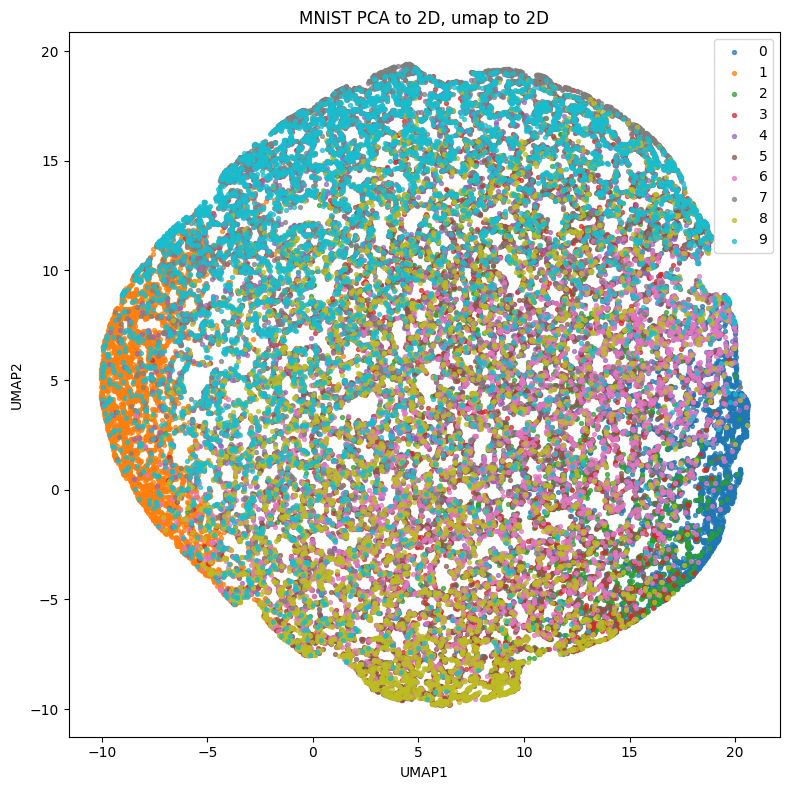

/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


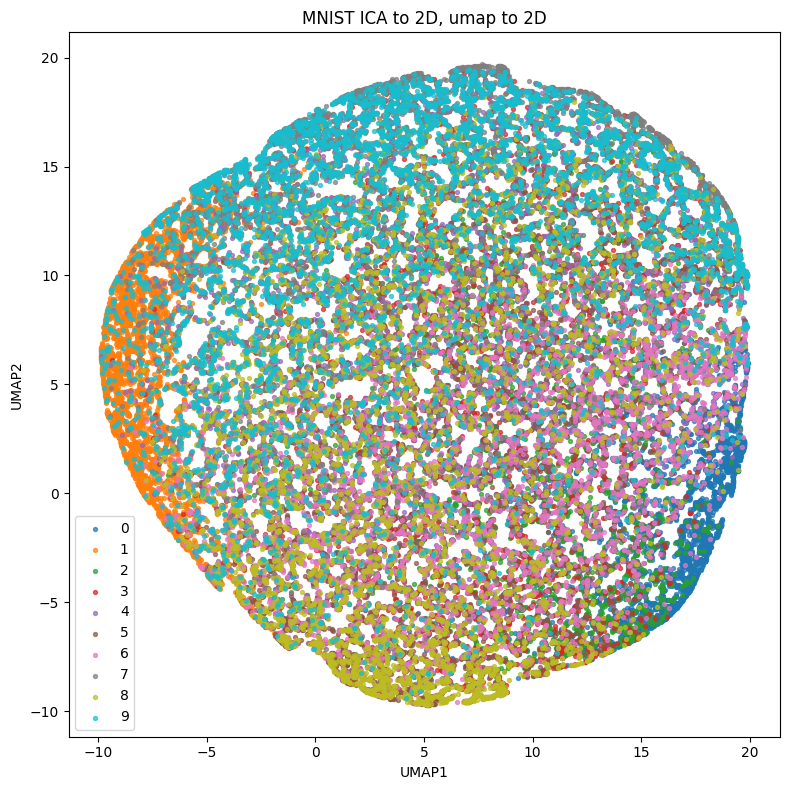

****************************************************************************************************
4 DIMENSIONS
****************************************************************************************************


/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


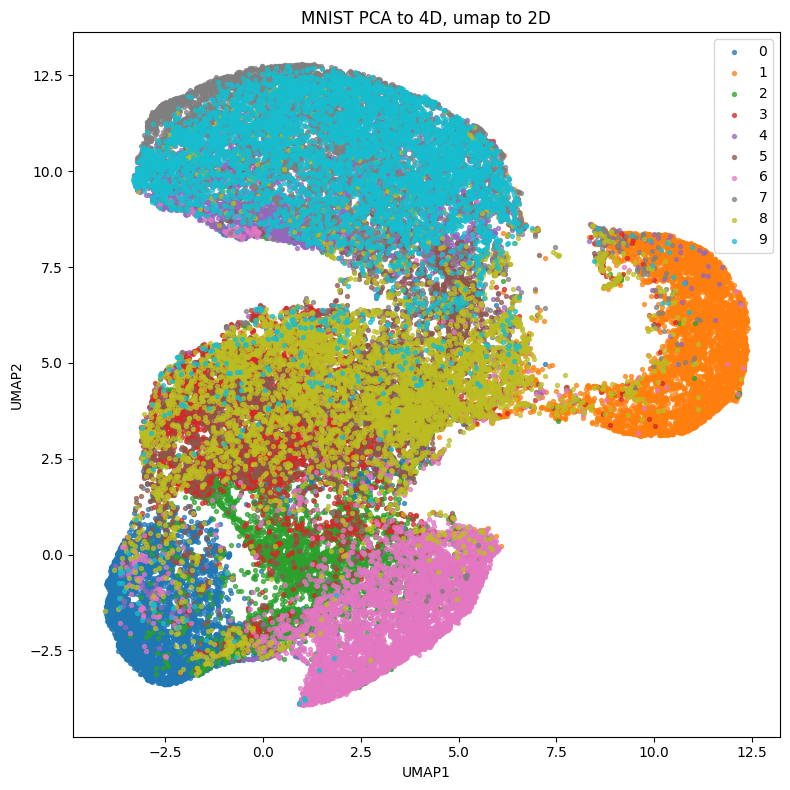

/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


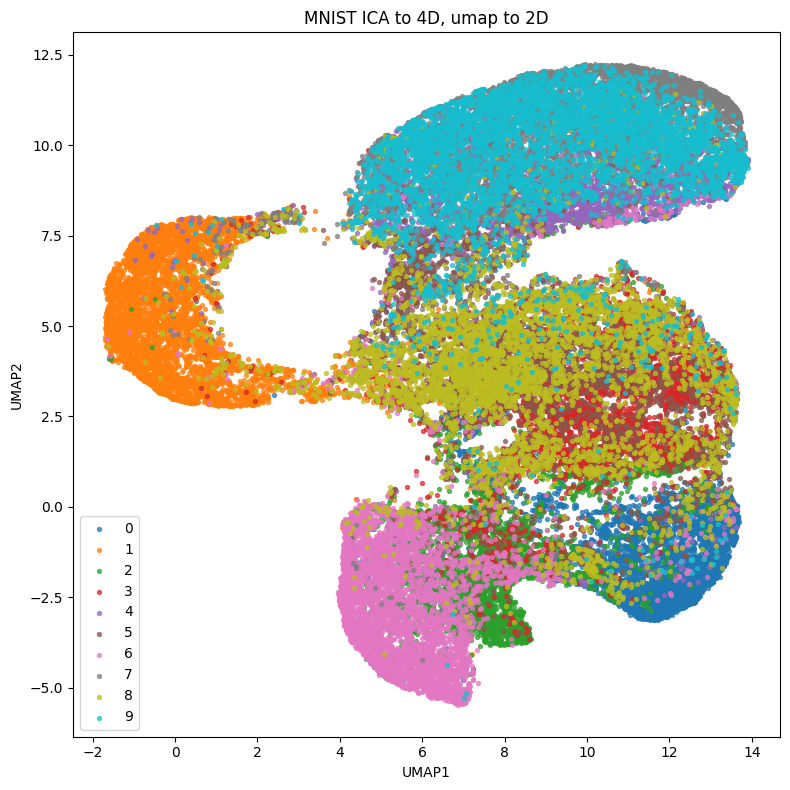

****************************************************************************************************
6 DIMENSIONS
****************************************************************************************************


/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


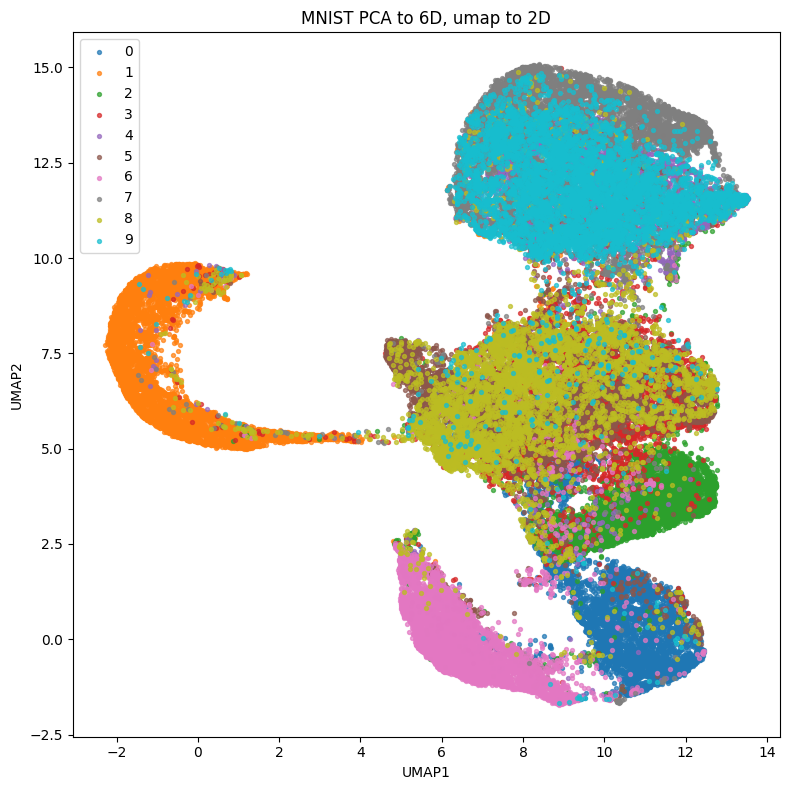

/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


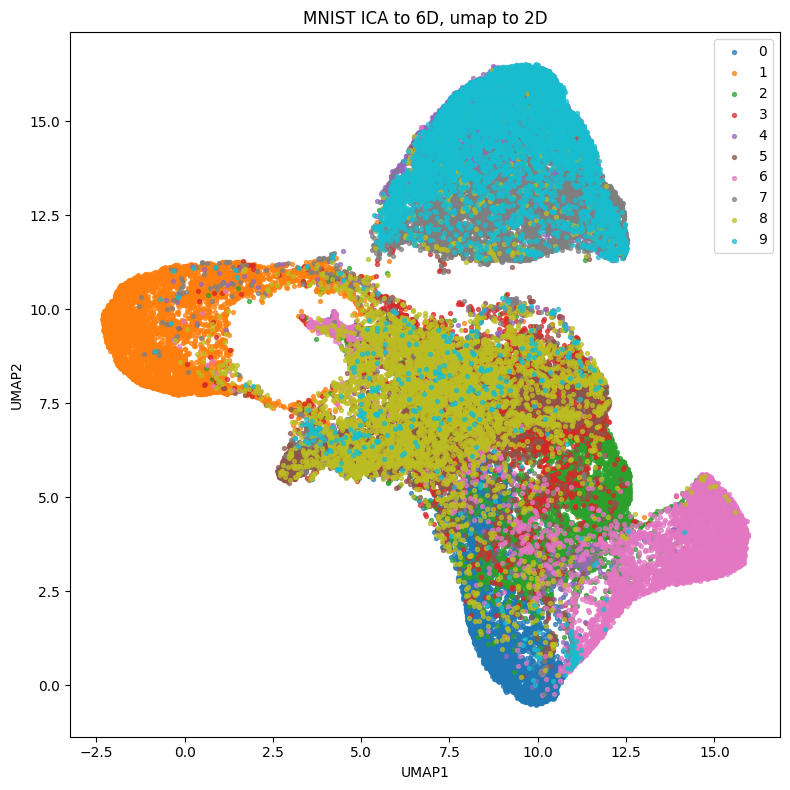

****************************************************************************************************
8 DIMENSIONS
****************************************************************************************************


/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


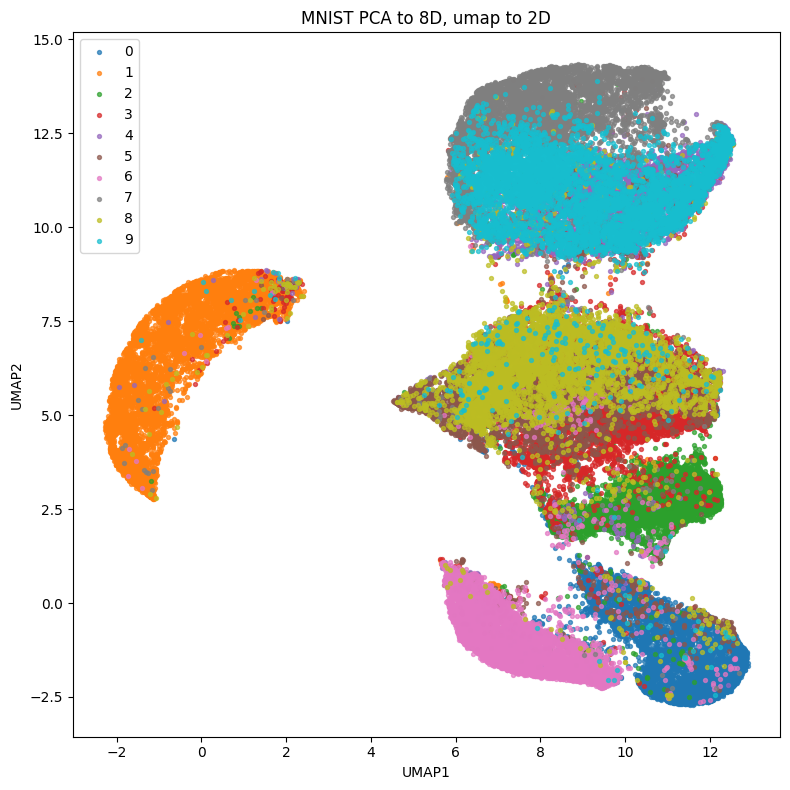

/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


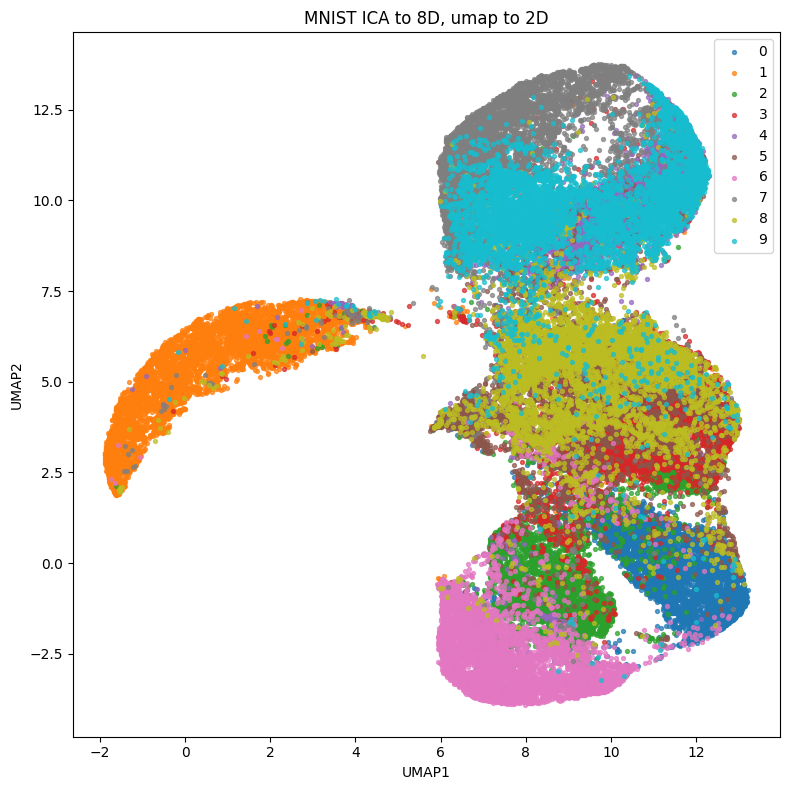

****************************************************************************************************
10 DIMENSIONS
****************************************************************************************************


/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


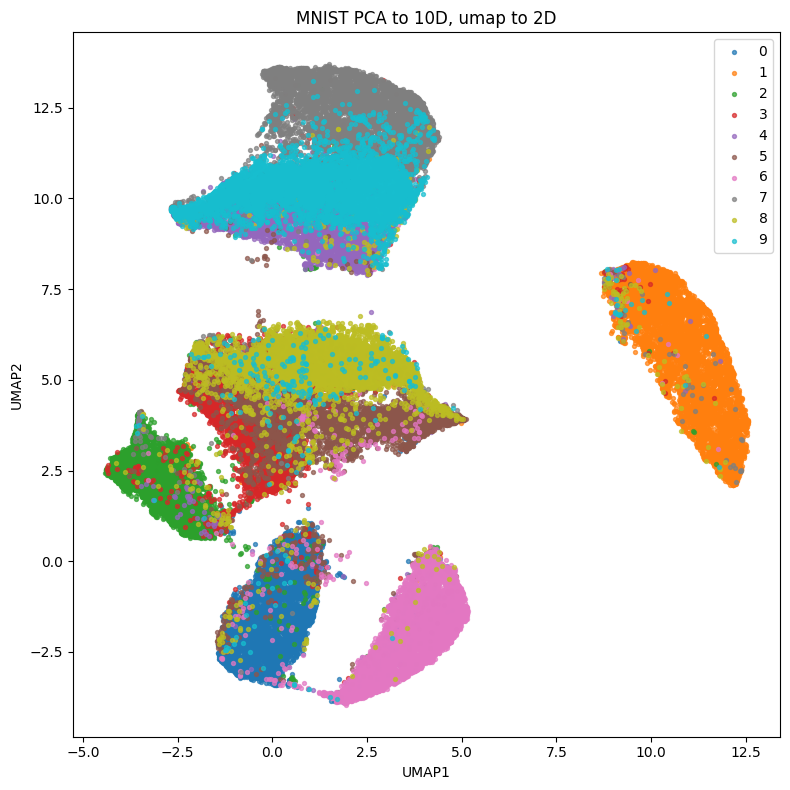

/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


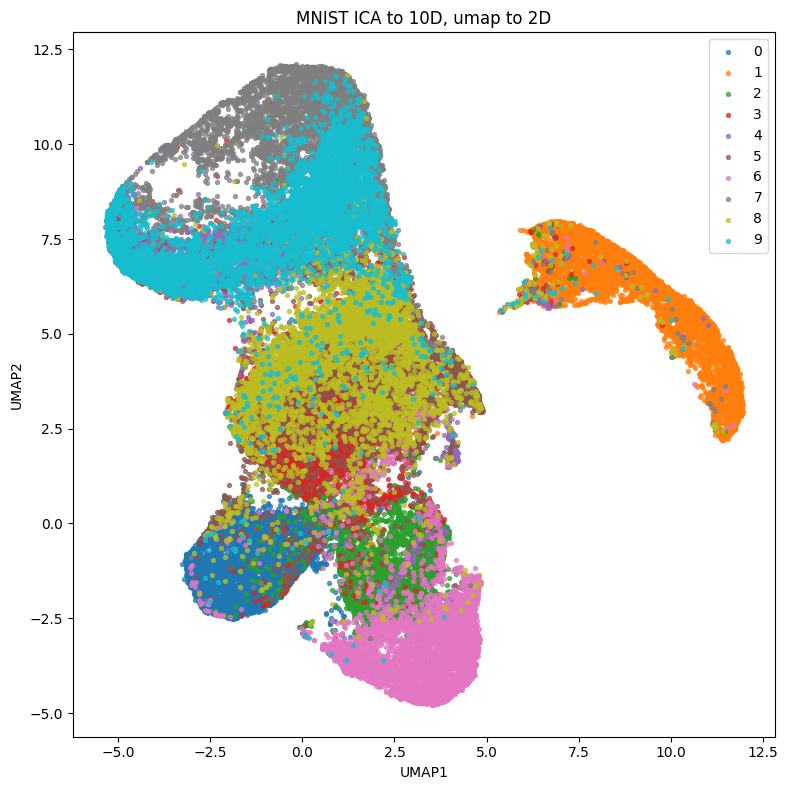

****************************************************************************************************
12 DIMENSIONS
****************************************************************************************************


/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


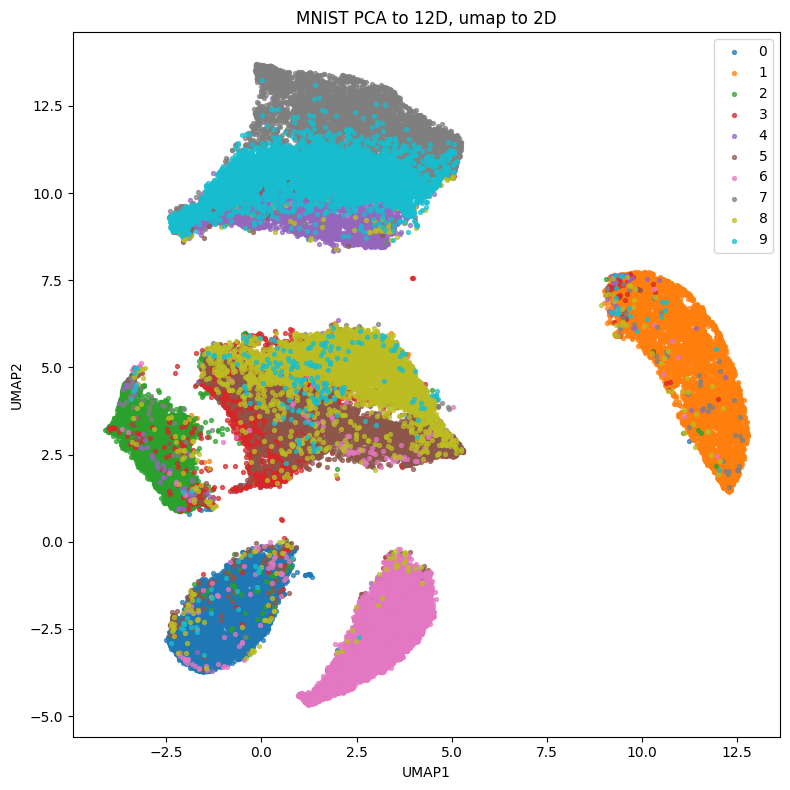

/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


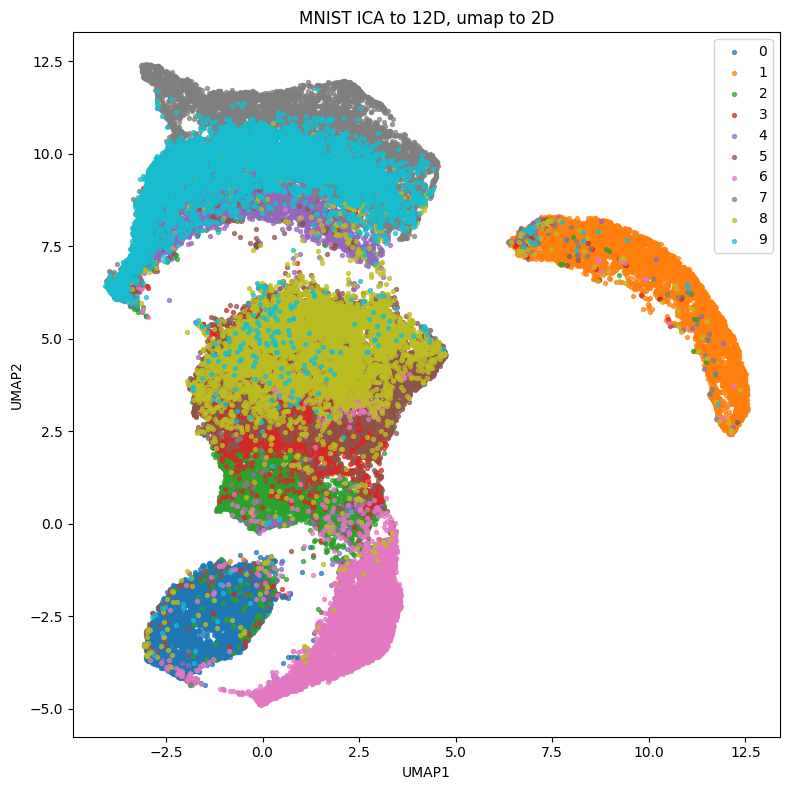

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import umap

random_state = 42
n_out = 2      # UMAP output dims: 2D plot

# Tips:
# - n_neighbors controls local vs global structure (higher ~ more global).
# - min_dist controls cluster tightness (lower → tighter clusters).
# - metric='cosine' often works well for embeddings/text; 'euclidean' is fine for many numeric sets.

for n_lin in range(2, 14, 2):
    print('*'*100)
    print(f'{n_lin} DIMENSIONS')
    print('*'*100)

    umap_cfg = dict(n_neighbors=31, min_dist=0.05, n_components=n_out, metric='euclidean', random_state=random_state)

    # Linear reducers (to n_lin-D)
    pca = make_pipeline(StandardScaler(with_mean=True), PCA(n_components=n_lin, random_state=random_state))
    X_pca = pca.fit_transform(X)
    umap_pca = umap.UMAP(**umap_cfg).fit_transform(X_pca)

    plt.figure(figsize=(8, 8))
    for cls in range(10):
        mask = y == cls
        plt.scatter(umap_pca[mask, 0], umap_pca[mask, 1], s=8, label=class_names[cls], alpha=0.7)

    plt.title(f"CIFAR-10 PCA to {n_lin}D, UMAP to 2D")
    plt.xlabel("UMAP1")
    plt.ylabel("UMAP2")
    plt.legend()
    plt.tight_layout()
    plt.show()

    ica = make_pipeline(StandardScaler(with_mean=True), FastICA(n_components=n_lin, random_state=random_state, max_iter=1000))
    X_ica = ica.fit_transform(X)
    umap_ica = umap.UMAP(**umap_cfg).fit_transform(X_ica)

    plt.figure(figsize=(8, 8))
    for cls in range(10):
        mask = y == cls
        plt.scatter(umap_ica[mask, 0], umap_ica[mask, 1], s=8, label=class_names[cls], alpha=0.7)

    plt.title(f"CIFAR-10 ICA to {n_lin}D, UMAP to 2D")
    plt.xlabel("UMAP1")
    plt.ylabel("UMAP2")
    plt.legend()
    plt.tight_layout()
    plt.show()

/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


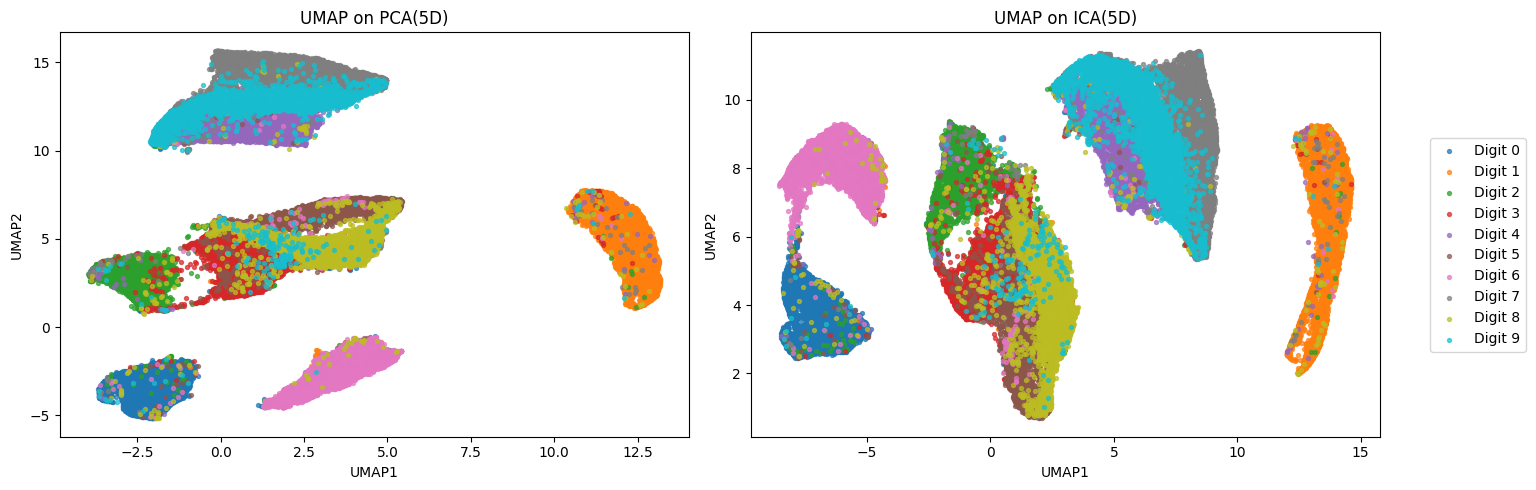

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import umap

random_state = 42
n_lin = 25    # target dims for PCA/ICA
n_out = 2      # UMAP output dims: 2D plot

# Linear reducers (to n_lin-D)
pca = make_pipeline(StandardScaler(with_mean=True), PCA(n_components=n_lin, random_state=random_state))
X_pca = pca.fit_transform(X)

ica = make_pipeline(StandardScaler(with_mean=True), FastICA(n_components=n_lin, random_state=random_state, max_iter=1000))
X_ica = ica.fit_transform(X)

# UMAP from n_linD → 2D
# Tips:
# - n_neighbors controls local vs global structure (higher ~ more global).
# - min_dist controls cluster tightness (lower → tighter clusters).
# - metric='cosine' often works well for embeddings/text; 'euclidean' is fine for many numeric sets.
umap_cfg = dict(n_neighbors=30, min_dist=0.05, n_components=n_out, metric='euclidean', random_state=random_state)

umap_pca = umap.UMAP(**umap_cfg).fit_transform(X_pca)
umap_ica = umap.UMAP(**umap_cfg).fit_transform(X_ica)

# ----- Plot with legend showing CIFAR-10 class-color mapping -----
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: UMAP on PCA
for cls in range(10):
    mask = y == cls
    ax1.scatter(umap_pca[mask, 0], umap_pca[mask, 1], s=8, label=class_names[cls], alpha=0.7)
ax1.set_title("CIFAR-10: UMAP on PCA")
ax1.set_xlabel("UMAP1")
ax1.set_ylabel("UMAP2")

# Plot 2: UMAP on ICA
for cls in range(10):
    mask = y == cls
    ax2.scatter(umap_ica[mask, 0], umap_ica[mask, 1], s=8, label=class_names[cls], alpha=0.7)
ax2.set_title("CIFAR-10: UMAP on ICA")
ax2.set_xlabel("UMAP1")
ax2.set_ylabel("UMAP2")

# Add a shared legend
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1)

plt.tight_layout()
plt.show()